{'np': <module 'numpy' from '/Users/pieterbecking/Desktop/Boeing-ADM-DRL-Github/.venv/lib/python3.10/site-packages/numpy/__init__.py'>, 'MAX_AIRCRAFT': 6, 'MAX_FLIGHTS_PER_AIRCRAFT': 12, 'ROWS_STATE_SPACE': 7, 'COLUMNS_STATE_SPACE': 39, 'ACTION_SPACE_SIZE': 91, 'DEPARTURE_AFTER_END_RECOVERY': 1, 'TIMESTEP_HOURS': 1, 'DUMMY_VALUE': -999, 'RESOLVED_CONFLICT_REWARD': 10000, 'DELAY_MINUTE_PENALTY': 11.5, 'MAX_DELAY_PENALTY': 7500, 'NO_ACTION_PENALTY': 0, 'CANCELLED_FLIGHT_PENALTY': 1000, 'LAST_MINUTE_THRESHOLD': 120, 'LAST_MINUTE_FLIGHT_PENALTY': 455, 'AHEAD_BONUS_PER_MINUTE': 0.1, 'TIME_MINUTE_PENALTY': 1, 'TERMINATION_REWARD': 500, 'MIN_TURN_TIME': 0, 'MIN_BREAKDOWN_PROBABILITY': 0, 'DEBUG_MODE': False, 'DEBUG_MODE_TRAINING': False, 'DEBUG_MODE_REWARD': False, 'DEBUG_MODE_PRINT_STATE': False, 'DEBUG_MODE_CANCELLED_FLIGHT': False, 'DEBUG_MODE_VISUALIZATION': False, 'DEBUG_MODE_BREAKDOWN': False, 'DEBUG_MODE_ACTION': False, 'DEBUG_MODE_STOPPING_CRITERIA': False, 'DEBUG_MODE_SCHEDULING': Fa

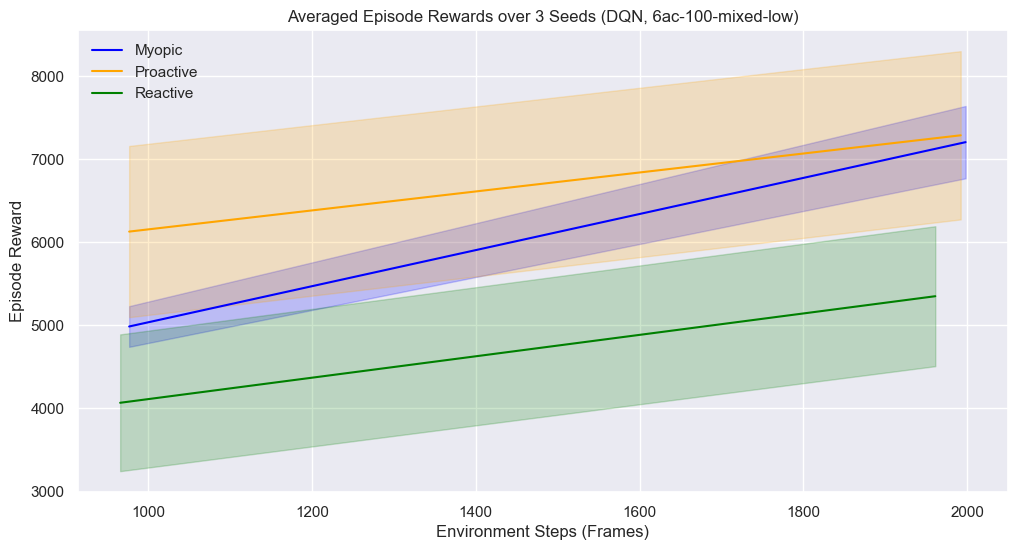

Averaged reward vs steps plot saved to big-run-2/6ac-100-mixed-low/plots/averaged_rewards_over_steps_6ac-100-mixed-low.png


--- PPO ---


Step 2





**** TRAINING_FOLDERS_PATH: ../data/Training/6ac-100-mixed-medium/ ****



--- DQN ---


Training on 6ac-100-mixed-medium
Calculated EPSILON_DECAY_RATE: 0.003883031004330459
EPSILON DECAY RATE:  0.003883031004330459
Using device: mps
CUDA available: False
Number of GPUs available: 0
cuDNN enabled: True
Device: mps
Using MacBook M1
Device info: {'device_type': 'MacBook M1'}
Training on 5000 days of data (50 episodes of 100 scenarios)
Results directory created at: ../results/dqn/20241209-09-19
Running DQN training for seed 42...
Models will be saved to: ../trained_models/dqn/myopic-1085.zip
Device: mps
Using MacBook M1
Logging to /var/folders/m6/gwyqzldd12bg_s3mrl40tp6r0000gn/T/SB3-2024-12-09-09-19-34-849952
(886/1000) myopic - episode 1 - epsilon 0.03 - reward this episode: 2339.16
(1822/1000) myopic - episode 2 - epsilon 0.03 - reward th

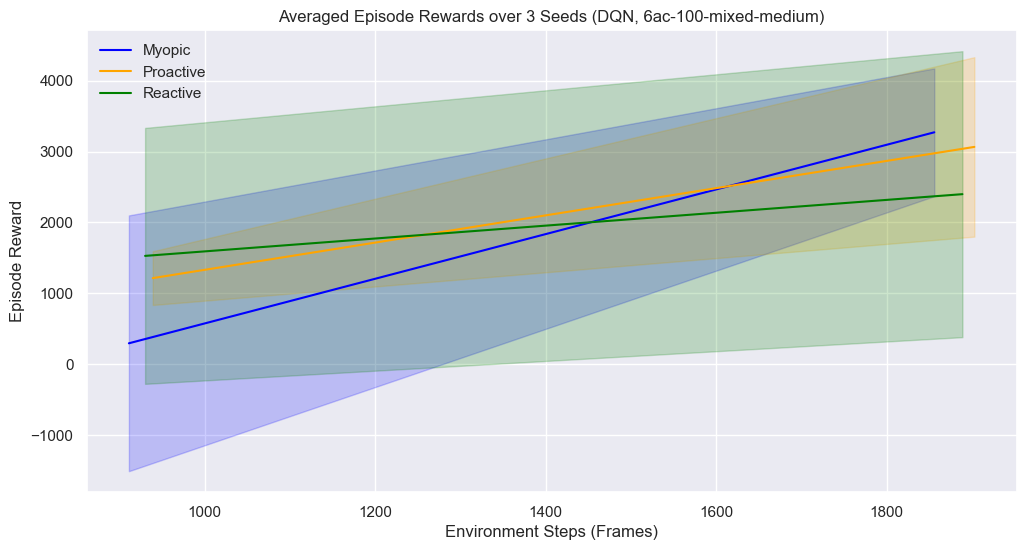

Averaged reward vs steps plot saved to big-run-2/6ac-100-mixed-medium/plots/averaged_rewards_over_steps_6ac-100-mixed-medium.png


--- PPO ---


Step 3





**** TRAINING_FOLDERS_PATH: ../data/Training/6ac-100-mixed-high/ ****



--- DQN ---


Training on 6ac-100-mixed-high
Calculated EPSILON_DECAY_RATE: 0.003883031004330459
EPSILON DECAY RATE:  0.003883031004330459
Using device: mps
CUDA available: False
Number of GPUs available: 0
cuDNN enabled: True
Device: mps
Using MacBook M1
Device info: {'device_type': 'MacBook M1'}
Training on 5000 days of data (50 episodes of 100 scenarios)
Results directory created at: ../results/dqn/20241209-09-19
Running DQN training for seed 42...
Models will be saved to: ../trained_models/dqn/myopic-1094.zip
Device: mps
Using MacBook M1
Logging to /var/folders/m6/gwyqzldd12bg_s3mrl40tp6r0000gn/T/SB3-2024-12-09-09-19-59-347029
(846/1000) myopic - episode 1 - epsilon 0.04 - reward this episode: 2001.36
(1732/1000) myopic - episode 2 - epsilon 0.03 - reward 

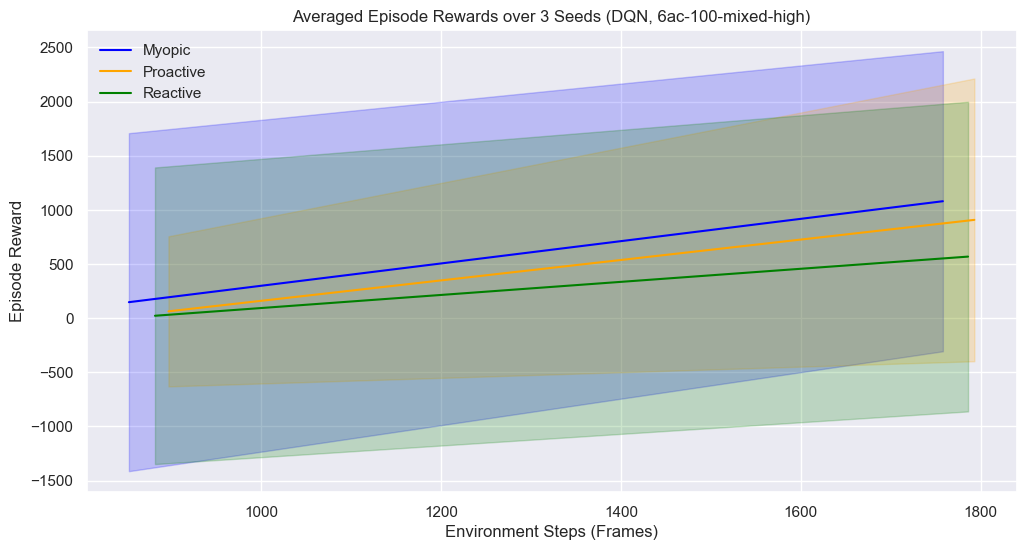

Averaged reward vs steps plot saved to big-run-2/6ac-100-mixed-high/plots/averaged_rewards_over_steps_6ac-100-mixed-high.png


--- PPO ---




In [1]:
import numpy as np
import random
import time
import src.config as config
import pandas as pd
import os

"""
6ac-1-deterministic-na
6ac-1-mixed-high
6ac-1-mixed-low
6ac-1-mixed-medium
6ac-1-stochastic-high
6ac-1-stochastic-low
6ac-1-stochastic-medium
6ac-10-deterministic-na
6ac-10-mixed-high
6ac-10-mixed-low
6ac-10-mixed-medium
6ac-10-stochastic-high
6ac-10-stochastic-low
6ac-10-stochastic-medium
6ac-100-deterministic-na
6ac-100-mixed-high
6ac-100-mixed-low
6ac-100-mixed-medium
6ac-100-stochastic-high
6ac-100-stochastic-low
6ac-100-stochastic-medium
6ac-1000-deterministic-na
6ac-1000-mixed-high
6ac-1000-mixed-low
6ac-1000-mixed-medium
6ac-1000-stochastic-high
6ac-1000-stochastic-low
6ac-1000-stochastic-medium

"""
all_folders = [
    "../data/Training/6ac-100-deterministic-na/",
    "../data/Training/6ac-100-mixed-low/",
    "../data/Training/6ac-100-mixed-medium/",
    "../data/Training/6ac-100-mixed-high/",
    "../data/Training/6ac-100-stochastic-low/",
    "../data/Training/6ac-100-stochastic-medium/",
    "../data/Training/6ac-100-stochastic-high/",
]
all_folders_temp = [
    "../data/Training/6ac-100-mixed-low/",
    "../data/Training/6ac-100-mixed-medium/",
    "../data/Training/6ac-100-mixed-high/",
]

def get_config_variables(config_module):
    config_vars = {
        key: value for key, value in vars(config_module).items()
        if not key.startswith("__") and not callable(value)  # Exclude magic methods and functions
    }
    return config_vars



# In train_dqn_both_timesteps.ipynb:
MAX_TOTAL_TIMESTEPS = 1000
SEEDS = [42, 43, 44]
brute_force_flag = False
cross_val_flag = False
early_stopping_flag = False
CROSS_VAL_INTERVAL = 10000
printing_intermediate_results = True

save_folder = "big-run-2"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

config_values = get_config_variables(config)
# save all cofnig values form src/config.py to a csv in the save_results_big_run folder
print(config_values)
config_df = pd.DataFrame([config_values])  # Wrap config_values in a list to create a single row DataFrame

config_df['MAX_TOTAL_TIMESTEPS'] = MAX_TOTAL_TIMESTEPS
config_df['SEEDS'] = str([str(seed) for seed in SEEDS])
config_df['brute_force_flag'] = brute_force_flag
config_df['cross_val_flag'] = cross_val_flag
config_df['early_stopping_flag'] = early_stopping_flag
config_df['CROSS_VAL_INTERVAL'] = CROSS_VAL_INTERVAL
config_df['printing_intermediate_results'] = printing_intermediate_results

config_df.to_csv(f"{save_folder}/config.csv", index=False)




step = 0
for training_folder in all_folders_temp:
    step += 1
    print(f"Step {step}")
    print()
    print()
    print()
    print()
    print()
    print(f"**** TRAINING_FOLDERS_PATH: {training_folder} ****")
    print()
    print()
    print()
    print("--- DQN ---")
    print()
    print()
    TRAINING_FOLDERS_PATH = training_folder
    
    stripped_scenario_folder = TRAINING_FOLDERS_PATH.split("/")[-2]
    save_results_big_run = f"{save_folder}/{stripped_scenario_folder}"



    %run train_dqn_both_timesteps.ipynb
    print()
    print()
    print("--- PPO ---")
    print()
    print() 
    # %run train_ppo_both.ipynb

